# <img src="https://img.icons8.com/bubbles/100/000000/3d-glasses.png" style="height:50px;display:inline"> EE 046746 - Technion - Computer Vision

#### Dahlia Urbach

## Tutorial 12 - Tracking
---

## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Tracking](#-Tracking)
    * [Tracking Challenges]()
    * [Tracking as inference]()
    * [Kalman Filter](#-Kalman-Filter)
        * [One Dimensional Example]()
        * [Multi-Dimensional Example]()
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)
  

In [1]:
# imports for the tutorial
import numpy as np
import matplotlib.pyplot as plt
import time
import cv2
from IPython.display import Image,Video
from IPython.lib.display import YouTubeVideo
%matplotlib inline

### <img src="https://img.icons8.com/cotton/64/000000/track-order.png" style="height:50px;display:inline"> Tracking
---


### Tracking example

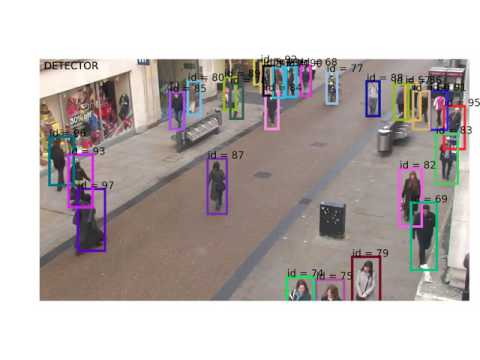

In [2]:
YouTubeVideo('SKXk6uB8348')

* <a href="https://github.com/ZidanMusk/experimenting-with-sort">Source</a> 

### Tracking Challenges
---
1. Hard to compute optical flow
2. Object could be moving rapidly
3. Errors would accumulate
4. Occlusions, disoclutions
5. Multiple objects tracking

Desired properties:

* Real-Time
* Coherent smooth trajectories

Use dynamic modeling!

### Tracking as Inference
---
* We start with a prediction that relies on the previous state $x_{t-1}$. Given the last state we have a belief/**prediction** that the next step $x_{t}$ will be close to the previous step (blue Gaussian).
* Now, we take a **measurement**  $y_t$, suffering from some noise (orange Gaussian).
* Using the measurment $y_t$ we can correct and **update** our prediction $x_{t}$ (grey Gaussian).


<img src="./assets/tut12__kal2.jpg" width="600">


<a href="https://fr.mathworks.com/videos/understanding-kalman-filters-part-3-optimal-state-estimator--1490710645421.html">Image Source</a> 


#### Steps of Tracking
* Prediction: We use the estimated state to predict the current state and uncertainty.

$$P(X_t|Y_0=y_0,...,Y_{t-1}=y_{t-1})$$
* Update: We use our sensors' observations to correct the predicted state and obtain a more accurate estimate.

$$P(X_t|Y_0=y_0,...,Y_{t}=y_{t})$$

#### Simplification Assumptions:

* The *dynamics model* is Markovian - describes the relationship between states $x_t$ and $x_{t-1}$, only the immediate past matters. $$P(X_t|X_0,...,X_{t-1}) = P(X_t|X_{t-1})$$
    * This means that the next state only depends on the last state. The state also includes the velocity, and not only position. It is a dynamics model.
* The *measurement model*, the measurment only depends on the current state - describes the relationship between the measurements $y_t$ and the state $x_t$ at time $t$. $$P(Y_t|X_0,Y_0,...,X_{t-1},Y_{t-1},X_{t}) = P(Y_t|X_{t})$$
    * A bit suspicious assumption, how come the sensor noise is not estimated by using previous measurements? In more advanced algorithms, the past is also considered.

Graphical model:

Note, we are changing the notations: $X_i->w_i$ are the states, and $Y_i->x_i$ are the measurments.

<img src="./assets/tut12_kal3.JPG" width="400">

* Image source - Prince 539


#### Simplify Tracking Steps

* Prediction
    * Given: $P(w_{t-1}|x_0,...,x_{t-1})$ (our last state belief)
    * Guess: $P(w_{t}|x_0,...,x_{t-1})$
    
Using the law total probability:

<img src="./assets/tut12_kal5.JPG" width="400">

Where $P(w_{t}|w_{t-1})$ is going to be our *dynamics model*.







* Correction 
    * Given: $P(w_{t-1}|x_0,...,x_{t-1})$ and $x_t$, adding our last measurmant
    * Compute: $P(w_{t}|x_0,...,x_{t-1},x_{t})$

Using base rules:
<img src="./assets/tut12_kal4.JPG" width="400">
Where $P(x_{t}|w_{t})$ is going to be our *mesurment model*.

#### Linear Dynamics Model

The transformation is linear and the noise is Gaussian $$w_t \sim N(\mu_p + \Psi w_{t-1},\Sigma_p)$$
$\Psi\in R^{D_w\times D_w}$ is either a scalar or a matrix.

#### Linear Measurment Model

$$x_t \sim N(\mu_m +\Phi w_{t},\Sigma_m)$$

$\Phi \in R^{D_x\times D_w}$ is either a scalar or a matrix.

$\Psi,\Phi,\mu_p,\mu_m,\Sigma_p,\Sigma_m$ are known and imply how our model works.

## <img src="https://img.icons8.com/nolan/64/filter.png" style="height:50px;display:inline">  Kalman Filter
---
The Kalman filter is one of the most popular algorithms in data fusion. Invented in 1960 by Rudolph Kalman, it is now used in our phones or satellites for navigation and tracking. The most famous use of the filter was during the <a href="https://news.ycombinator.com/item?id=12043206">Apollo 11 mission</a> to send and bring the crew back to the moon.

The Kalman filter is used for tracking a linear dynamical systems with additive normal noise. 
Therefore, for using Kalman filter we assume:
* The uncertainty over the world state is described by a normal distribution.
* The relationship between the measurements and the world is linear with additive normal noise.
* The relationship between the state at adjacent times is also linear with additive normal noise.

Gaussian modeling makes our model slightly simpler, as we only need to find the mean and the variance. Want to use non-Gaussian modeling? there are other filters.

<img src="./assets/tut12_kal1.png" width="600">


* Given a state $w_{t-1}$ we predict $w_t$ and our uncertainty is reduced. 
* Then we take a new noisy measurement $x_t$ and correct our state. 
* Adding information (new measurment) can only **reduce** our initial guess uncertainty.

#### Inference
Our goal is to compute the posterior probability $P(w_t|x_0,...,x_t)$ over state $w_t$ given all the measurements so far.
* Prediction
<img src="./assets/tut12_kal6.JPG" width="600">




* Correction
<img src="./assets/tut12_kal7.JPG" width="600">

* You can find the full explanation in Prince's book, chapter 19.

#### Updates

<img src="./assets/tut12_kal8.JPG" width="500">
<img src="./assets/tut12_kal9.JPG" width="600">

$K$ is usually known as **"Kalman Gain"**.

Notice:
* The Covariance prediction *always grows*.
* The Covariance update can only get *smaller*.

* Prediction vs Correction:
    * For a low measurment uncertanity (we know our measurments are precise): $\Sigma_m = 0$ then $K={\Phi}^{-1}$: $w_t$ depends only on the measurments. $$\mu_t = K(x_t-\mu_m), \Sigma_t = 0$$
    * For no prediction uncertanity (we know our predictions are precise): $\Sigma_{+} = 0$ then $K=0$: $w_t$ depends only on the prediction. $$\mu_t = \mu_{+}, \Sigma_t = \Sigma_{+} =  0$$
    * Generaly, low gain puts more weight to the prediction, and high Kalman gain puts more wights to the measurments.

### <img src="https://img.icons8.com/ios-filled/50/000000/example.png" style="height:50px;display:inline"> Examples
---

### One Dimensional Kalman Filter


* Let us write a code for the one-dimensional Kalman filters first. 
* Consider the case in which we measure the temperature from an erroneous thermometer.
* The following are the measurements taken from an erroneous thermometer at different times, also we assume that we know that the actual temperature is 45 degrees.

In [3]:
measurement = [45,48,49,41,42,60,46,47,42,46,47,41,40,43,45,46,43,45,46,
               41,39,45,48,42,43,44,45,46,47,42,40,41,41,61,45,45,43,42,42,40]
actual = 45
# measurement = actual + np.random.randn(len(measurement)) * 5 # tet for signal+noise

Let us plot these measurements using matplotlib

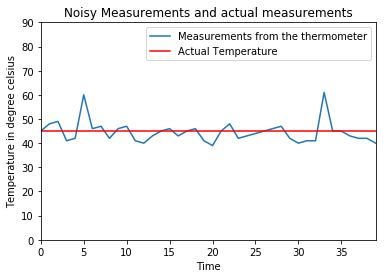

In [4]:
plt.title('Noisy Measurements and actual measurements')
plt.ylabel('Temperature in degree celsius')
plt.xlabel('Time')
plt.plot(measurement,label = 'Measurements from the thermometer')
# plt.hold(True)
plt.axhline(y=actual, color='r', linestyle='-',label = 'Actual Temperature')
plt.axis([0,len(measurement)-1,0,90])
plt.legend()
plt.show()

Now let’s run the code for the Kalman Filtering process.



In [5]:
initial_estimate = 60 # actually this can be anything 
initial_error_estimate = 2
error_in_measurement = 4
current_estimate = initial_estimate
current_error_estimate = initial_error_estimate
kalman_output_list = []
kalman_output_list.append(initial_estimate)
for i in range(len(measurement)):
    
    
  ####################################
  # Step 1 , calculate the Kalman Gain.
  
    kalman_gain = (current_error_estimate)/(current_error_estimate + error_in_measurement)
  ####################################
  # Step 2 , calculate the estimate at time 't' from the measurement and estimate at time 't-1'
    kalman_output = (current_estimate + (kalman_gain)*(measurement[i] - current_estimate))

    kalman_output_list.append(kalman_output)
    
    
  ####################################
  # Step 3 , calculate the error estimate at time 't'
    new_error_estimate = (1-kalman_gain)*(current_error_estimate)
    
    
  ##############################################
  # make the previous variables the current variables for the next iteration
    current_estimate = kalman_output
    current_error_estimate = new_error_estimate
  ##############################################

Now we have the Kalman Filters output with us.

Lets finally plot them and check our results.

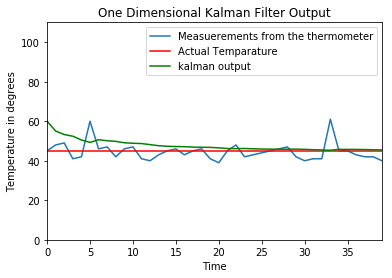

In [6]:
plt.title('One Dimensional Kalman Filter Output')
plt.xlabel('Time')
plt.ylabel('Temperature in degrees')
plt.plot(measurement,label = 'Measuerements from the thermometer')
plt.axhline(y=actual, color='r', linestyle='-',label = 'Actual Temparature')
# plt.hold(True)
plt.plot(kalman_output_list,'-g',label = 'kalman output')
plt.axis([0,len(measurement)-1,0,110])
plt.legend()
plt.show()

### Multi-Dimensional Case

<img src="./assets/tut12_balltracking.png" width="600">

The following code demonstrates tracking of a ball,rolling across the scene with the help of Kalman Filter algorithm used for object tracking

In [7]:
file = './assets/singleball.mov'
cap = cv2.VideoCapture(file)

In [8]:
Video('./assets/singleball.mov')

#### Background Subtraction 
* Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
* As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

<img src="./assets/tut12_background.JPG" width="600">
<a href="https://docs.opencv.org/master/d1/dc5/tutorial_background_subtraction.html">Image source
</a> 


* In this tutorial, we use the mixture of Gaussians (MOG) as done in the GrabCut algorithm.
* This time, the background is learned from a video, and there is no user intervention.
* You can use any segmentation method to extract the desired object.

#### Measuring Ball Location

For each frame:
1. Learn to substruct background using a mixture of Gaussians MOG (slightly similar to Grab-Cut) - improve during the process.
2. Extract contours
3. Add location measurement if exists else set to $[-1,-1]$ (out of range)

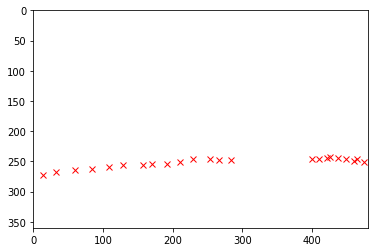

In [9]:
plt.figure()
# plt.hold(True)
plt.axis([0,cap.get(3),cap.get(4),0])
numframes = cap.get(4)
count = 0   # for counting the number of frames
cap = cv2.VideoCapture(file)
bgs = cv2.createBackgroundSubtractorMOG2()
# Let us make an array for storing the values of (x,y) co-ordinates of the ball
# If the ball is not visible in the frame then keep that row as [-1.0,-1.0]
# Thus lets initialize the array with rows of [-1.0 , -1.0]
measuredTrack = np.zeros((int(numframes), 2))-1
while count < (numframes):
    count += 1
    ret, img2 = cap.read()
#     cv2.imshow("Video",img2)
#     cv2.namedWindow("Video",cv2.WINDOW_NORMAL)
    foremat = bgs.apply(img2, learningRate = 0.01)
#     cv2.waitKey(20)
    ret, thresh = cv2.threshold(foremat, 220, 255, 0)
    im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    #print(len(contours))  ## This prints the number of contours (foreground objects detected)
    if len(contours) > 0:
        for i in range(len(contours)):
            area = cv2.contourArea(contours[i])  ## Calculates the Area of contours
            if area > 100: ## We check this because the area of the ball is bigger than 100 and we want to plot that only
                m = np.mean(contours[i],axis=0) ### mean is taken for finding the centre of the contour (ball in this case)
                measuredTrack[count-1,:] = m[0] 
                plt.plot(m[0,0], m[0,1], 'xr')
#     cv2.imshow('Foreground',foremat)
#     cv2.namedWindow("Foreground",cv2.WINDOW_NORMAL)
#     cv2.waitKey(80)
# cap.release()
# cv2.destroyAllWindows()
# print(measuredTrack)
### save the trajectory of the ball in a numpy file , so that it can be used
### later to be passed as an input to the Kalman Filter process.
np.save("ballTrajectory", measuredTrack)   
plt.axis((0,480,360,0))
plt.show()

* The above loop iterates over all frames of the video sequence.

* Each frame is plotted to the OpenCV figure video. Then the `apply()` method of the background subtractor instance is called, this method returns a foreground mask for the current frame.

* By applying a threshold to the foreground mask it is converted into a binary image, containing 1 at all pixels which belong to the foreground and 0 at all pixels belonging to background. An area of connected foreground pixels is a foreground object.

* The contours of foreground objects can be determined by applying OpenCV’s `findContours()` function. In general there can exist more than one foreground objects and corresponding contours in a frame.

#### Explanation of the Code

1) The centroid of the contour is assumed to be the location of the foreground object.

2) This location is tracked for each frame. The location is plotted into the matplotlib figure.

3) Moreover, for each frame the location of the tracked object is stored in the numpy array `measuredTrack`.

4) Finally the numpy array `measuredTrack` is stored to a file. The contents of this file (i.e. the measured track) constitute the input for the Kalman Filter. The Kalman Filter is implemented in another Python module (see Kalman Filter ) and provides a more accurate track of the moving object.

* **The track measured above shall be refined by Kalman filtering.** 
* Even though a Kalman Filter is implemented in OpenCV, we apply the Kalman Filter module `pykalman` due to its better documentation.

* So lets install `pykalman` first. Import the ”KalmanFilter” library from this amazing module. And, load the saved “ballTrajectory.npy” file.

In [10]:
from pykalman import KalmanFilter
Measured = np.load("ballTrajectory.npy")

* Remove the first part of the video from the measured array when the ball is not present in the video.
* So we need to remove all the rows of $[ -1.0,-1.0 ]$ untill the first measurement is recorded (the time when the ball enters the video).
* If you looked closely, you probably have noticed that the ball enters in the video sometime after the video starts.

In [11]:
while True:
    if Measured[0,0]==-1.:
        Measured=np.delete(Measured,0,0)
    else:
        break

numMeas = Measured.shape[0]

* However, as you can clearly see there are some parts of this array still have the $[-1.0 , -1.0]$ rows left.
* These indicate the parts of the video where the ball was inside the box and also the parts of the video after the ball is gone completely out of the vision.
* By applying Numpy Masked Arrays, these positions without measurement can be particullarly marked and the following Kalman Filter module is able to interprete these positions as **missing-measurement position**.
* Thus, at these positions we can use the help of the Kalman FIlter algorithm to predict the position of the ball even when it is behind the box or even out of the video completely !!!!

In [12]:
MarkedMeasure = np.ma.masked_less(Measured, 0)

In this demonstration the state is modeled as a *vector*, containing the variables:

* x-coordinate of current position: $x$

* y-coordinate of current position: $y$

* current speed in x-direction: $vx$

* current speed in y-direction: $vy$

The measured parameters are $x$ and $y$. Thus the transition matrix (process model) and the observation matrix (measurement model) are:

In [13]:
Transition_Matrix = [[1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]]  # Psi matrix
Observation_Matrix = [[1, 0, 0, 0], [0, 1, 0, 0]] # Phi matrix

Besides these two models the Kalman Filter requires:

1. An initial state, defined by `xinit,yinit,vxinit,vyinit`.

2. An initial state covariance `initstatecovariance`, which describes the certainty of the initial state.

3. A transition covariance, which describes the certainty of the process model.

4. An observation covariance, which describes the certainty of the measurement model.

In [14]:
xinit = MarkedMeasure[0,0] ## First Measurement of x-coord
yinit = MarkedMeasure[0,1] ## First Measurement of y-coord
vxinit = MarkedMeasure[1,0] - MarkedMeasure[0,0] ## as v = (d_1 - d_0)/(time)
vyinit = MarkedMeasure[1,1] - MarkedMeasure[0,1] 
initstate = [xinit, yinit, vxinit, vyinit]
initcovariance = 1.0e-3 * np.eye(4) 
transistionCov = 1.0e-4 * np.eye(4)
observationCov = 1.0e-1 * np.eye(2)
kf = KalmanFilter(transition_matrices=Transition_Matrix,
                  observation_matrices =Observation_Matrix,
                  initial_state_mean=initstate,
                  initial_state_covariance=initcovariance,
                  transition_covariance=transistionCov,
                  observation_covariance=observationCov)

By calling the `filter()` method of the KalmanFilter object, the track (`filtered_mean_state`) and its certainty in form of `filtered_state_covariances` are computed.

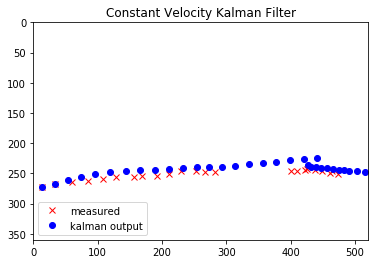

In [15]:
(filtered_state_means, filtered_state_covariances) = kf.filter(MarkedMeasure)
plt.plot(MarkedMeasure[:,0] ,MarkedMeasure[:,1], 'xr', label='measured')
plt.axis([0,520,360,0])
# plt.hold(True)
plt.plot(filtered_state_means[:,0],filtered_state_means[:,1],'ob',label='kalman output')
# plt.hold(True)
plt.legend(loc=3)
plt.title("Constant Velocity Kalman Filter")
plt.show()

### Problems with the Kalman filter

* It requires the temporal and measurement equations to be linear.
* It assumes that the marginal posterior is unimodal and can be well captured by a mean and covariance; hence, it can only ever have one hypothesis about the position of the object

Can be solved using *Extended Kalman filter* and the *unscented Kalman filter*, both allow nonlinear state update and measurement equations. 

*Particle filtering* abandons the use of the normal distribution and describes the state as a complex multi-modal distribution.

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject
* Kalman Filter by Michel va Biezen - https://www.youtube.com/watch?v=CaCcOwJPytQ&list=PLX2gX-ftPVXU3oUFNATxGXY90AULiqnWT

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
----
* Towardsdatascience
    * https://towardsdatascience.com/computer-vision-for-tracking-8220759eee85 - Jeremy Cohen
    * https://towardsdatascience.com/sensor-fusion-90135614fde6 - Jeremy Cohen
    
    * https://towardsdatascience.com/optimal-estimation-algorithms-kalman-and-particle-filters-be62dcb5e83 - Pier Paolo Ippolito
    * https://towardsdatascience.com/particle-filter-a-hero-in-the-world-of-non-linearity-and-non-gaussian-6d8947f4a3dc
    
    
* Chapter 11. Tutorial: The Kalman Filter, Tony Lacey - http://web.mit.edu/kirtley/kirtley/binlustuff/literature/control/Kalman%20filter.pdf 
* Kalman filter code and tutorial source - 
    * https://iitmcvg.github.io/summer_school/Session4/
    * https://www.hdm-stuttgart.de/~maucher/Python/ComputerVision/html/Tracking.html
* Prince, chapter 19

* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
